In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

In [103]:
import pandas as pd
import numpy as np
import datetime as dt

In [117]:
df = pd.read_csv('steps_data.csv')
cols = ['day_time','distance','step_count','active_time','calorie','walk_step_count','run_step_count']
df = df[cols]
df = df.set_index('day_time')
df.index = pd.to_datetime(df.index,unit='ms')
df.index = df.index.strftime('%D')
df = df.groupby(df.index).sum()
df['active_time'] = df['active_time']/3600000
df.index = pd.to_datetime(df.index)
# df['distance'] /= 1000

In [128]:
date_index = np.arange('2020-05-15','2020-06-30', dtype='datetime64[D]')
df = pd.concat([pd.DataFrame(index=date_index),df],axis=1)
df = df.replace(np.nan,0)
df = df[df.index >= '2020-05-15']
df = df[df.index < dt.datetime.now()]

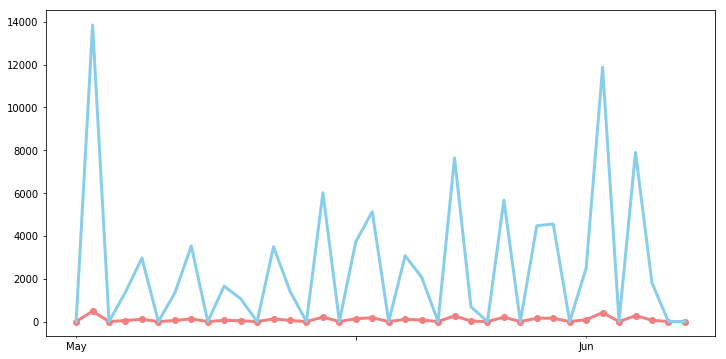

In [129]:
plt.figure(figsize=(12,6))

ax = plt.gca()

plt.plot(df.index,df['calorie'],'-o',color='lightcoral',linewidth=3,label='Calories')
plt.plot(df.index,df['step_count'],color='skyblue', linewidth=3,label='Steps')
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) 
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

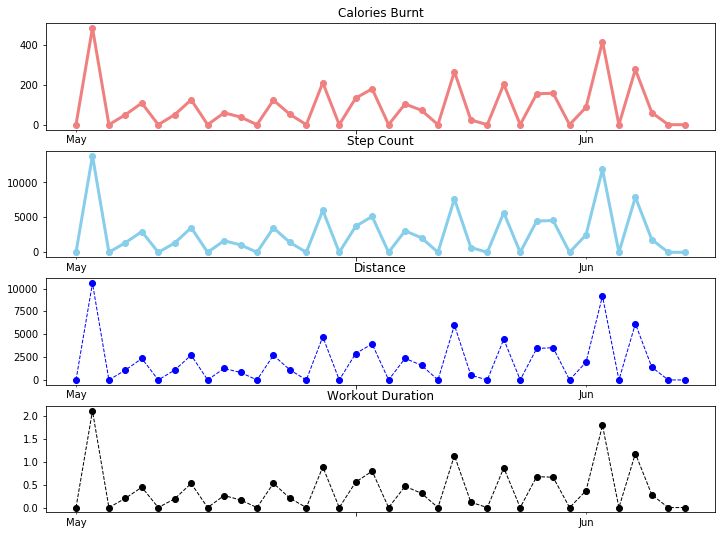

In [134]:
plt.figure(figsize=(12,9))
ax1 = plt.subplot(4,1,1)
ax1.set_title('Calories Burnt')
plt.plot(df.index,df['calorie'],'-o',color='lightcoral',linewidth=3,label='Calories')

ax2 = plt.subplot(4,1,2,sharex=ax1)
ax2.set_title('Step Count')
plt.plot(df.index,df['step_count'],'-o',color='skyblue', linewidth=3,label='Steps')

ax3 = plt.subplot(4,1,3,sharex=ax1)
ax3.set_title('Distance')
plt.plot(df.index,df['distance'],'--o',color='blue', linewidth=1,label='Distance')

ax3 = plt.subplot(4,1,4,sharex=ax1)
ax3.set_title('Workout Duration')
plt.plot(df.index,df['active_time'],'--o',color='k', linewidth=1,label='Active Time')
# ax2.legend(loc=2)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) 
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))